## Project on Flight Price Prediction

### PROBLEM STATEMENT :

##### Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

#### FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

##### You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

* Importing require library for performing EDA, Data Wrangling and data cleaning

In [1]:
import pandas as pd  # for data wrangling purpose
import numpy as np   # Basic computation library
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt  # ploting package
%matplotlib inline
import warnings  # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Flight Prediction dataset Excel file using pandas
df = pd.read_excel('Data_Train.xlsx')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated
df.head()

No of Rows: 10683
No of Columns: 11


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']}

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Comment :

* Training dataset contain 10683 rows and 11 columns.
* Our Target variable is **Price**. We gone predict flight prices using **Various Regression Algorithms.**
* Some feature with date and time related columns are mention with object datatype. **We gone convert them into datetime datatype format along with going to perform some feature engineering over them to create few new columns of our interest.**

**Converting Date and time columns from object type to Datetime type**

In [6]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


#### Details of Feature engineering operation over various datetime datatype feature

* **We know that flight price vary according to season,demand and festival offer like new year, diwali. Considering this Date of joureny is seem like important feature affecting variation of flight price.**
* From excel file we know that all data belong to 2019. So year doesnot matter.
* We gone split Date of journey into date and month columns.
* **Conversion of duration column into new columns represnting duration in min.**
* Extracting Hour and minutes from Dep_Time and Arrival Time columns.

#### 1. Feature Engineering on Date of Journey Columns

In [8]:
# Extracting Day from Data_of_journey column
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

# Dropping Date_of_journey column
df.drop('Date_of_Journey',axis=1,inplace=True)

In [9]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-05-27 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-27 05:50:00,2023-05-27 13:15:00,7h 25m,2 stops,No info,7662,5,1


#### 2. Feature Engineering on 'Duration' Column

In [10]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration'] = pd.to_numeric(df['Duration'])

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10683 non-null  datetime64[ns]
 5   Arrival_Time     10683 non-null  datetime64[ns]
 6   Duration         10683 non-null  int64         
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10683 non-null  object        
 9   Price            10683 non-null  int64         
 10  Journey_Day      10683 non-null  int64         
 11  Journey_Month    10683 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 1001.7+ KB
None


#### 3. Feature Engineering on 'Dep_Time' Column

In [12]:
# Extracting Hours from Dep_Time column
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

# Dropping Dep_Time column
df.drop("Dep_Time",axis=1,inplace=True)

#### 4. Feature Engineering on 'Arrival_Time' Column

In [13]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

In [14]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 10683
No of Columns: 14


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [15]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min'], object: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']}

In [16]:
# Spliting data into categorical and Numerical Variable
Numerical = ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']

Categorical = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

#### We also need to do some feature engineering on Source and Destination columns, We can see at some place Dehli is mention and other places New Dehli is mention.
**First enlist different unique values in categorical variable and afterwards we will perform feature engineering.**

In [17]:
for i in Categorical:
    print('Unique value counts of ',i, 'Enlisted as Below Table :')
    print('-'*40)
    print(df[i].value_counts())
    print("*"*120)

Unique value counts of  Airline Enlisted as Below Table :
----------------------------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
************************************************************************************************************************
Unique value counts of  Source Enlisted as Below Table :
----------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
**************************************

#### Observation :

* "New Delhi" is mention as "Delhi". We we gone regulated it.
* No info is mention as 'No Info' few times.
* **Very Few Premium economy or Business class flight in dataset. This might be due to high ticket price**

In [18]:
# Replacing "New Delhi" as "Delhi" in Destination column
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

# In the column "Additional Info", "No Info" and "No info" are same so replacing it by "No Info
df['Additional_Info'] = df['Additional_Info'].replace("No info", "No Info")

### Data Integrity Check
**Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.**

In [19]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

222

In [20]:
df.duplicated().max()

True

**Around 222 duplicate data rows. It huge and we gone drop them. There is no point on training model on duplicated data.**

In [21]:
df.drop_duplicates(keep='last',inplace= True)

In [22]:
df.shape

(10461, 14)

**Let check if any whitespace, 'NA' or '-' exist in dataset.**

In [23]:
df.isin([' ','NA','-','?']).sum().any()

False

## Missing value check

In [24]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
Route                         1        0.009559
Total_Stops                   1        0.009559
Airline                       0        0.000000
Source                        0        0.000000
Destination                   0        0.000000
Duration                      0        0.000000
Additional_Info               0        0.000000
Price                         0        0.000000
Journey_Day                   0        0.000000
Journey_Month                 0        0.000000
Dep_Hour                      0        0.000000
Dep_Min                       0        0.000000
Arrival_Hour                  0        0.000000
Arrival_Min                   0        0.000000


** Missing values are present in Total Stops and Route. These variable are categorical in nature, we gone impute them with mode.**

In [25]:
# Checking the mode of Categorical columns "Route" 
print("The mode of Route is:",df["Route"].mode())

# Filling the missing values in "Route" withs its mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

# Checking the mode of Categorical columns "Total_Stops"
print("The mode of Total_Stops is:",df["Total_Stops"].mode())

# Filling the mising values in "Total_Stops" by its mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

The mode of Route is: 0    DEL → BOM → COK
Name: Route, dtype: object
The mode of Total_Stops is: 0    1 stop
Name: Total_Stops, dtype: object


### Missing value check after imputation

In [26]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

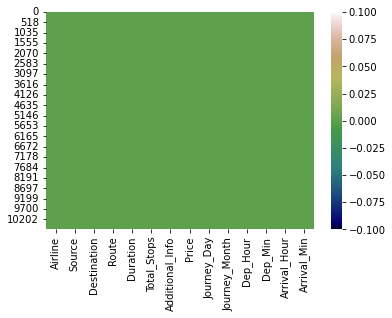

In [27]:
# Heatmap of missing value
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

### Comment :

**Finally, No Missing Value and duplicate entry is Present.**

We are Now Yes To Go Further !!!

## Statistical Matrix

In [28]:
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
Duration,10461.000000,629.945034,500.742197,5.000000,170.000000,505.000000,910.000000,2860.000000
Price,10461.000000,9027.212504,4624.861032,1759.000000,5224.000000,8266.000000,12346.000000,79512.000000
Journey_Day,10461.000000,12.629194,8.791165,3.000000,5.000000,6.000000,21.000000,27.000000
Journey_Month,10461.000000,5.535130,2.995285,1.000000,3.000000,5.000000,6.000000,12.000000
Dep_Hour,10461.000000,12.476341,5.726072,0.000000,8.000000,11.000000,18.000000,23.000000
Dep_Min,10461.000000,24.408278,18.817167,0.000000,5.000000,25.000000,40.000000,55.000000
Arrival_Hour,10461.000000,13.389638,6.853854,0.000000,8.000000,14.000000,19.000000,23.000000
Arrival_Min,10461.000000,24.723258,16.569495,0.000000,10.000000,25.000000,35.000000,55.000000


In [29]:
df[Categorical].describe().T.style.background_gradient(cmap='summer_r')

,count,unique,top,freq
Airline,10461,12,Jet Airways,3700
Source,10461,5,Delhi,4346
Destination,10461,5,Cochin,4346
Route,10461,128,DEL → BOM → COK,2377
Total_Stops,10461,5,1 stop,5626
Additional_Info,10461,9,No Info,8184


### Observation :
* The Minimum flight ticket price is Rs.1759 and Maximum flight ticket price is Rs.79512.
* The ( mean > median ) for Price,Journey_Day,Duration and Dep_Hour, which mean right skew data.
* The ( mean < median ) for Dep_Min,Arrival_Hour and Arrival_Min which mean left skew data.
* **Presense of outliers in Duration & Price columns as we see huge difference in 75% and max.**
* High value of std. deviation indicating spread of data.
* There are 12 airline in dataset with maximum flight run by Jet Airways.
* The data of 128 route in dataset and we find maximum flight on route DEL → BOM → COK.
* Long route flight have atleast one 1 stop.

## Exploring Features Source

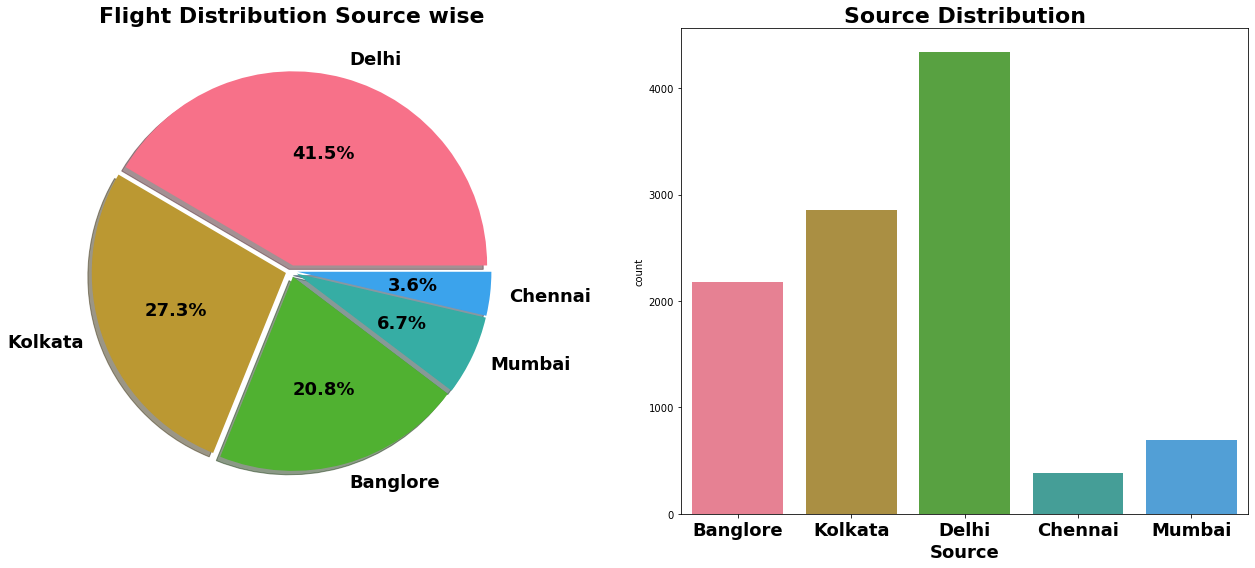

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Source wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Source',data=df,ax=ax[1])
ax[1].set_title('Source Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Source",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

### Observation :
* **Maximum flight depart from Delhi followed by Kolkata.**

### Let Explore Source With respect to Target Variable

<Figure size 864x504 with 0 Axes>

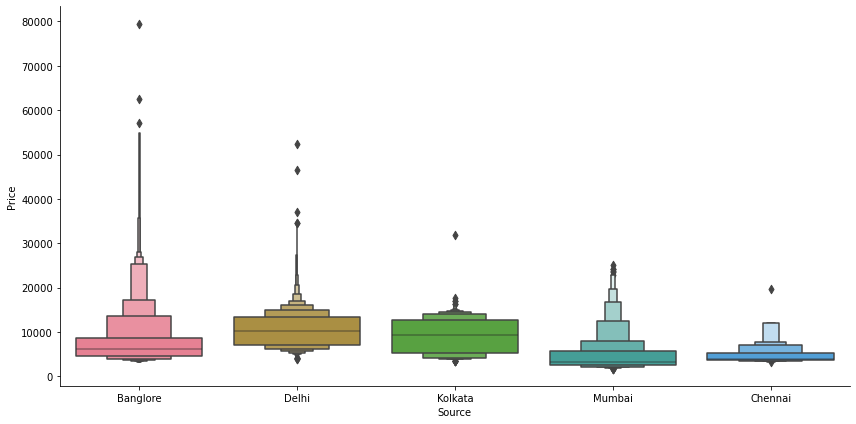

In [31]:
# Source vs Average Price
plt.figure(figsize=(12,7))
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=2)
plt.show()

**Based upon Source location Maximum Fare Comes for Banglore flight.**

## Destination VS Price

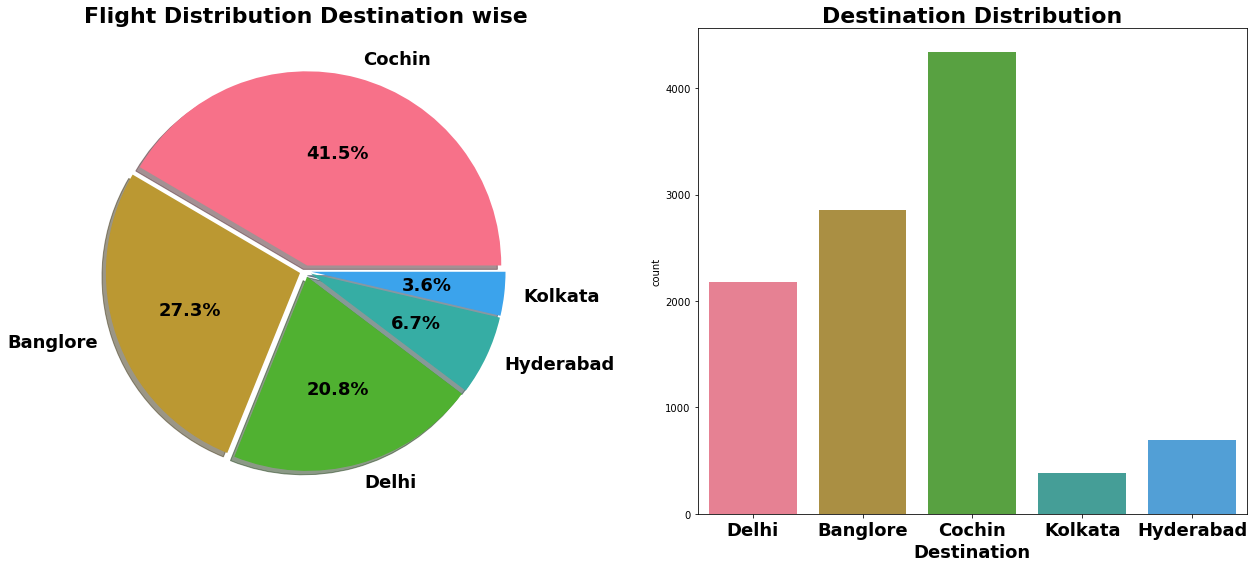

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Destination'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Destination wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Destination',data=df,ax=ax[1])
ax[1].set_title('Destination Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Destination",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

**Maximum 41.5% Flight lands into cochin followed by Banglore.**

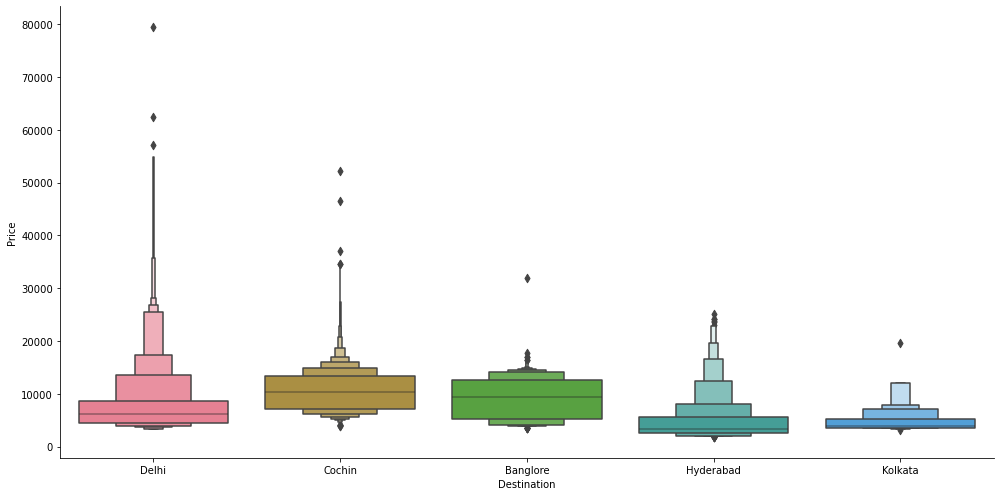

In [33]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),
            kind = "boxen",height = 7, aspect = 2 )
plt.show()

**The Flight ticket price range in Delhi is the maximum, reason may be traffic & the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)**

## Airlines VS Source

In [34]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No Info,13302,3,1,16,50,21,35


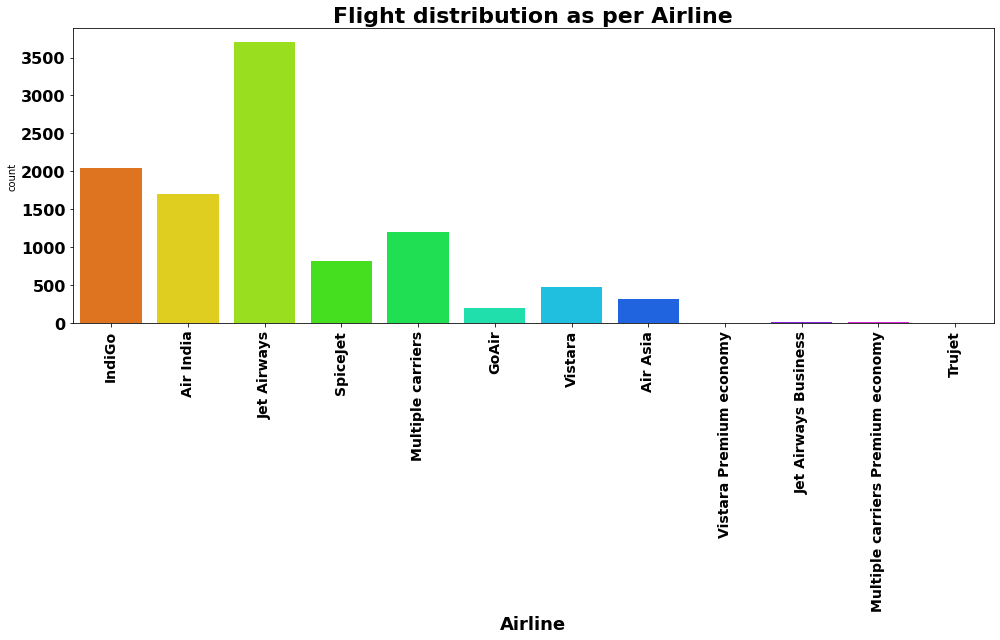

In [35]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Airline'],  palette='hsv')
plt.title('Flight distribution as per Airline', fontsize=22, fontweight='bold')
plt.xlabel('Airline', fontsize=18,fontweight='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

### Comment :
* jet airways Airline runs highest number of flights out of all flights.
* **Very Few Premium class flights.**

### Let Visualise Price according to these Airline

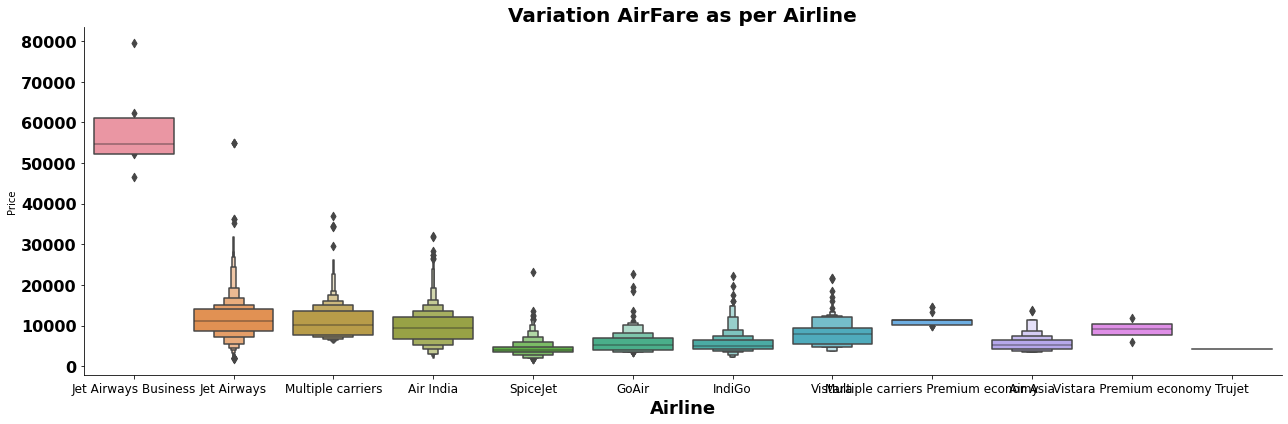

In [36]:
# Airline vs AveragePrice
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),
            kind="boxen",height=6, aspect=3)
plt.title("Variation AirFare as per Airline",fontsize=20, fontweight='bold')
plt.xlabel('Airline', fontsize=18,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation:
* Full service airlines Jet airways and Air India are always highly priced due to various amenities they provide.
* Low-cost carriers like indigo and spicejet have a lower and similar fare range

## Duration VS Price

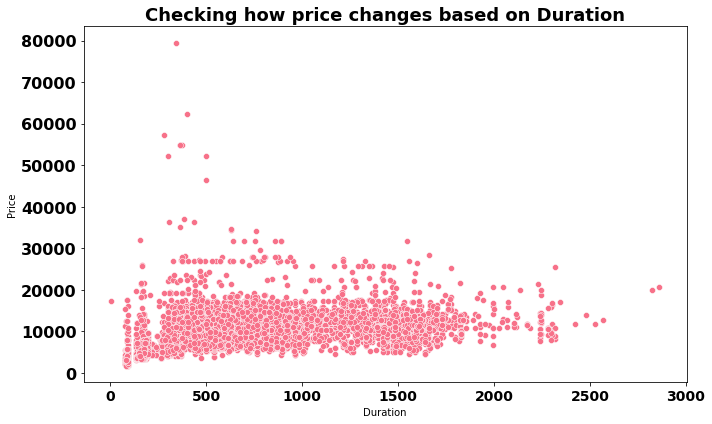

In [37]:
#duration v/s AveragePrice
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duration', y='Price')
plt.title("Checking how price changes based on Duration",fontsize=18, fontweight='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()


**We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)**

## Total Stops VS Price

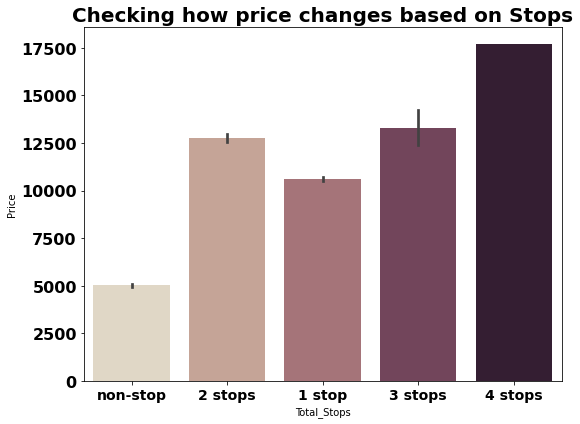

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(df["Total_Stops"],df["Price"],data=df,palette="ch:.28")
plt.title("Checking how price changes based on Stops",fontsize=20, fontweight='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

**As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.**

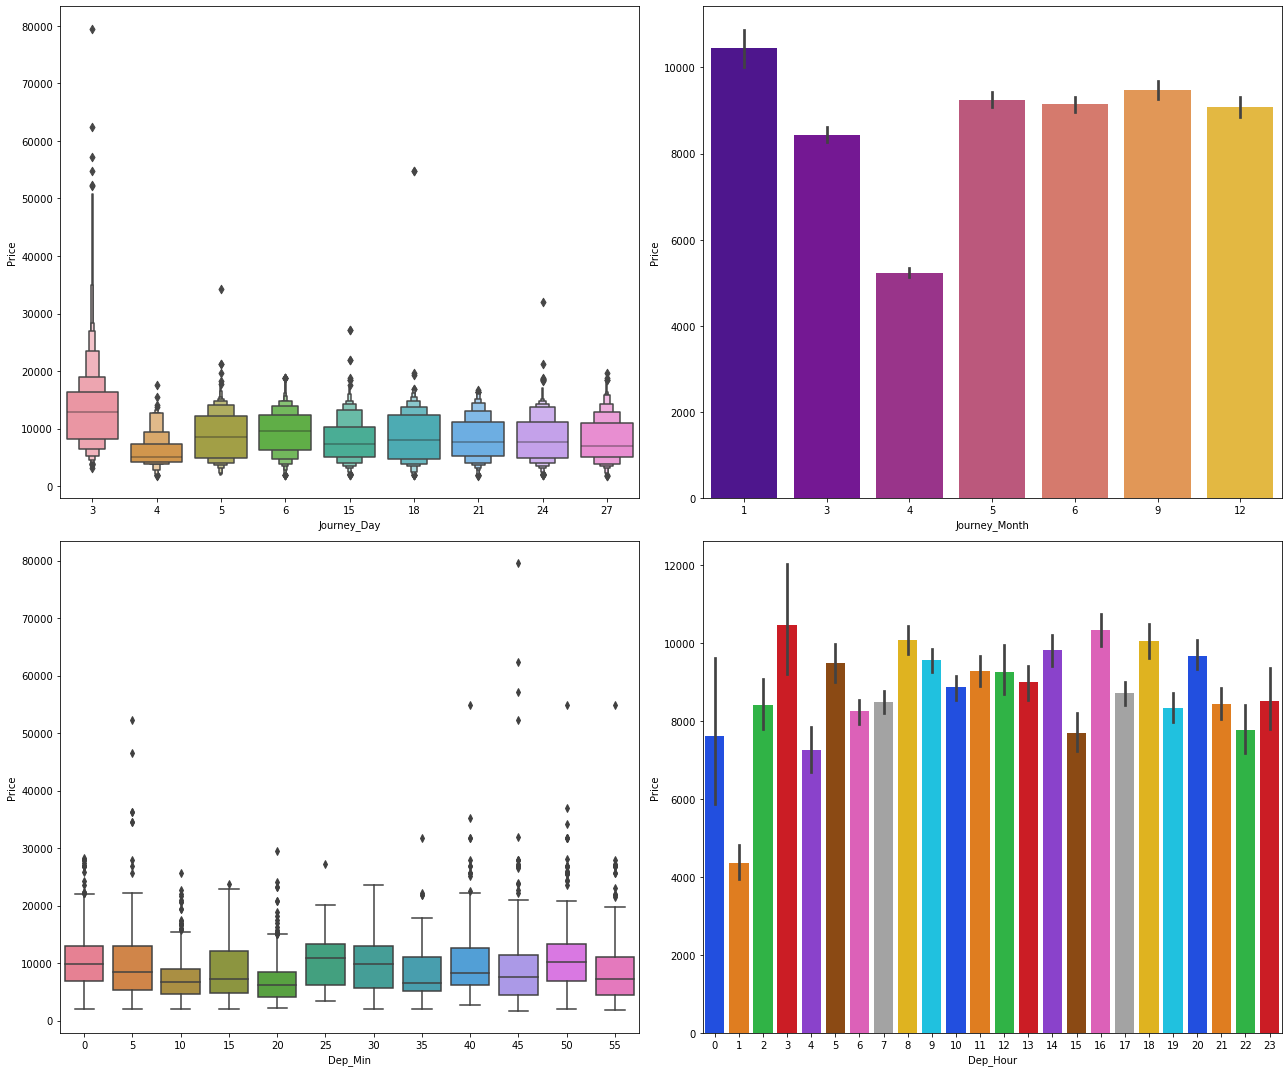

In [39]:
fig, axes = plt.subplots(2,2,figsize=(18,15))

# Checking relation between Journey_Day and Price
sns.boxenplot(x='Journey_Day',y='Price',ax = axes[0,0],data=df)

# Checking relation between Journey_Mionth and Price
sns.barplot(x='Journey_Month',y='Price',ax = axes[0,1],data=df,palette='plasma')

# Checking relation between Dep_Min and Price
sns.boxplot(x='Dep_Min',y='Price',ax=axes[1,0],data=df,palette='husl')

# Checking relation between Dep_Hour and Price
sns.barplot(x='Dep_Hour',y='Price',ax=axes[1,1],data=df,palette="bright")
plt.show()

### Observation :
* Airfare is high on Day 3 followed by Day 18.
* January month are most expensive than others while airfare least expensive in April month.

# Encoding categorical data

In [40]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()    

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,170,4,6,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,6,7662,5,1,5,50,13,15
2,4,2,1,118,1140,1,6,13882,6,9,9,25,4,25
3,3,3,0,91,325,0,6,6218,5,12,18,5,23,30
4,3,0,2,29,285,0,6,13302,3,1,16,50,21,35


In [41]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info'], int64: ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']}

# Feature selection and Engineering

## 1. Outliers Detection and Removal

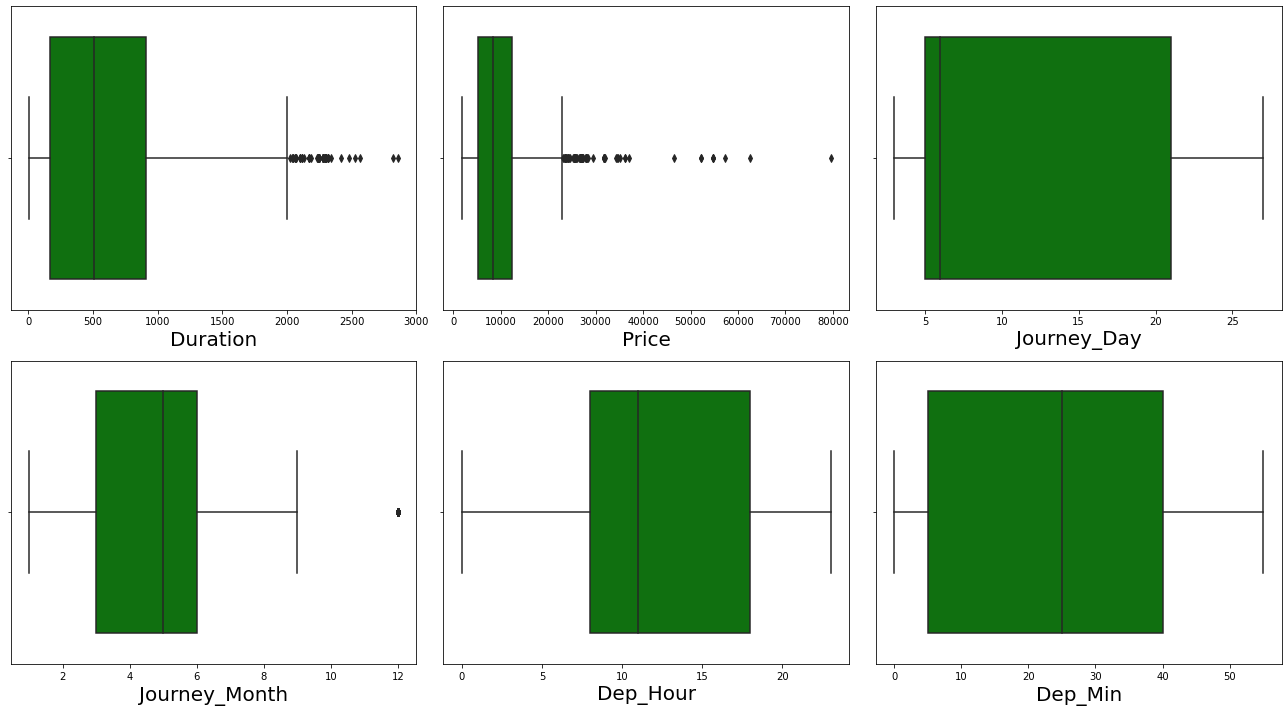

In [42]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**From Boxplot we can see outliers exist dataset.**

### Outliers removal using Zscore method

In [43]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (10461, 14)
Shape of the dataframe after removing outliers:  (10289, 14)
Percentage of data loss post outlier removal:  1.6442022751171015


## 2. Skewness of features

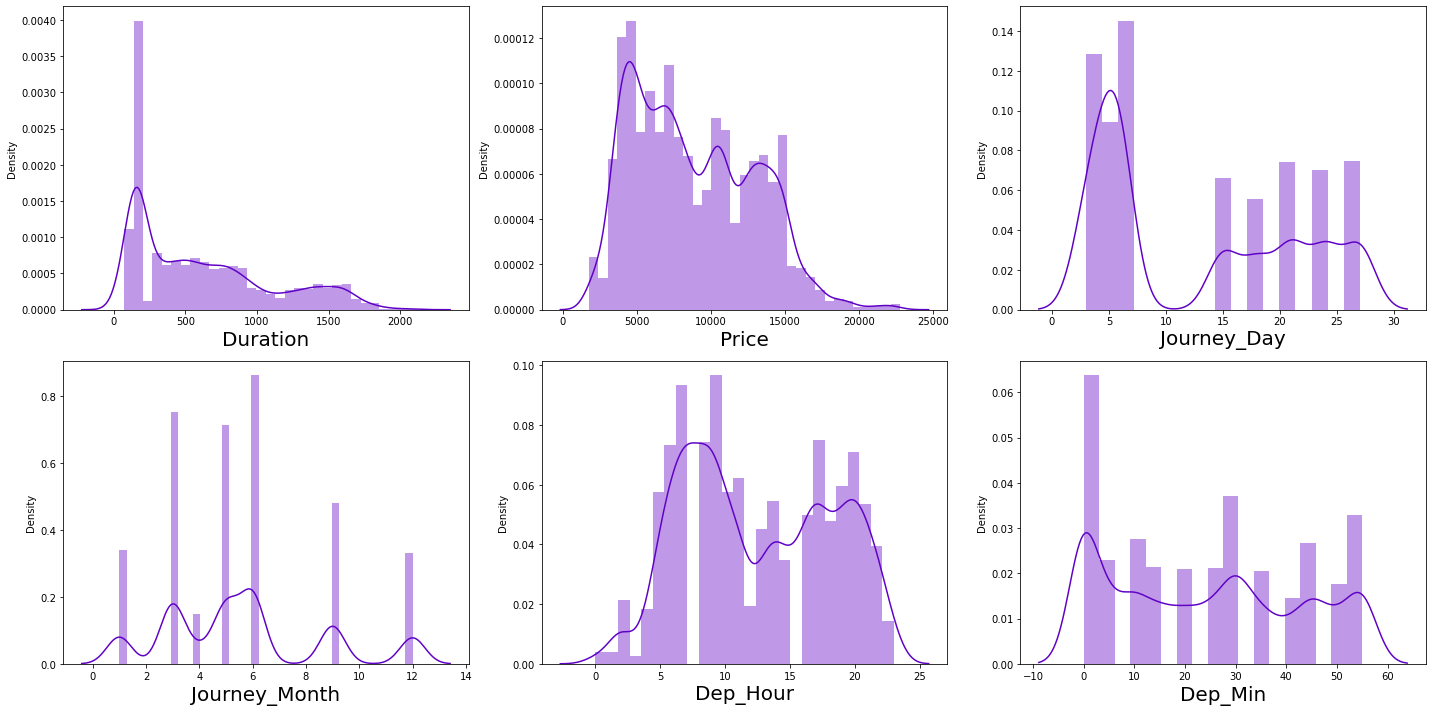

In [44]:
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('gnuplot')
plotnum=1
for col in Numerical:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

**We also going to ignore sknewness in target feature.**

In [45]:
df.skew()

Airline            0.721810
Source            -0.436014
Destination        0.850689
Route             -0.487883
Duration           0.820318
Total_Stops        0.599846
Additional_Info   -0.726010
Price              0.442553
Journey_Day        0.361840
Journey_Month      0.636388
Dep_Hour           0.099829
Dep_Min            0.176249
Arrival_Hour      -0.371973
Arrival_Min        0.107114
dtype: float64

**Price and duration are continous numerical data with skewed nature. Out of which Price is target variable, so ingore it.**

**We gone transform duration. For rest others we gone ignore skewness present as they discrete numerical and categorical feature**

In [46]:
df['Duration'] = np.log1p(df['Duration'])

### Checking skewness after transformation.

In [47]:
df['Duration'].skew()

-0.14885157403409577

## 3. Corrleation

In [48]:
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.015504,0.071028,0.029372,-0.115570,0.034367,0.100328,-0.037164,0.030017,-0.012245,-0.039750,-0.063211,0.001202,-0.075916
Source,-0.015504,1.000000,-0.430431,0.390544,0.128243,-0.235253,-0.035504,0.077542,-0.005684,0.041855,0.061320,-0.049390,0.028036,0.020829
Destination,0.071028,-0.430431,1.000000,-0.219421,-0.519574,0.517818,0.132394,-0.334660,0.016181,-0.061807,-0.090543,0.094539,-0.062342,0.006426
Route,0.029372,0.390544,-0.219421,1.000000,0.368942,-0.454621,-0.004211,0.245817,0.081385,0.019817,-0.072813,-0.062484,0.020383,-0.179203
Duration,-0.115570,0.128243,-0.519574,0.368942,1.000000,-0.817248,-0.277367,0.672463,-0.044900,0.080802,-0.004032,-0.038597,0.067942,-0.127676
Total_Stops,0.034367,-0.235253,0.517818,-0.454621,-0.817248,1.000000,0.263522,-0.626234,0.038820,-0.065168,0.038382,0.053461,-0.100318,0.178777
Additional_Info,0.100328,-0.035504,0.132394,-0.004211,-0.277367,0.263522,1.000000,-0.155222,-0.006106,-0.041823,-0.063337,0.028095,-0.025678,0.044119
Price,-0.037164,0.077542,-0.334660,0.245817,0.672463,-0.626234,-0.155222,1.000000,-0.146315,0.072558,0.011200,-0.055109,0.042929,-0.102230
Journey_Day,0.030017,-0.005684,0.016181,0.081385,-0.044900,0.038820,-0.006106,-0.146315,1.000000,-0.282914,-0.009465,-0.010120,-0.001491,-0.019360
Journey_Month,-0.012245,0.041855,-0.061807,0.019817,0.080802,-0.065168,-0.041823,0.072558,-0.282914,1.000000,0.027182,0.009782,-0.002404,-0.023438


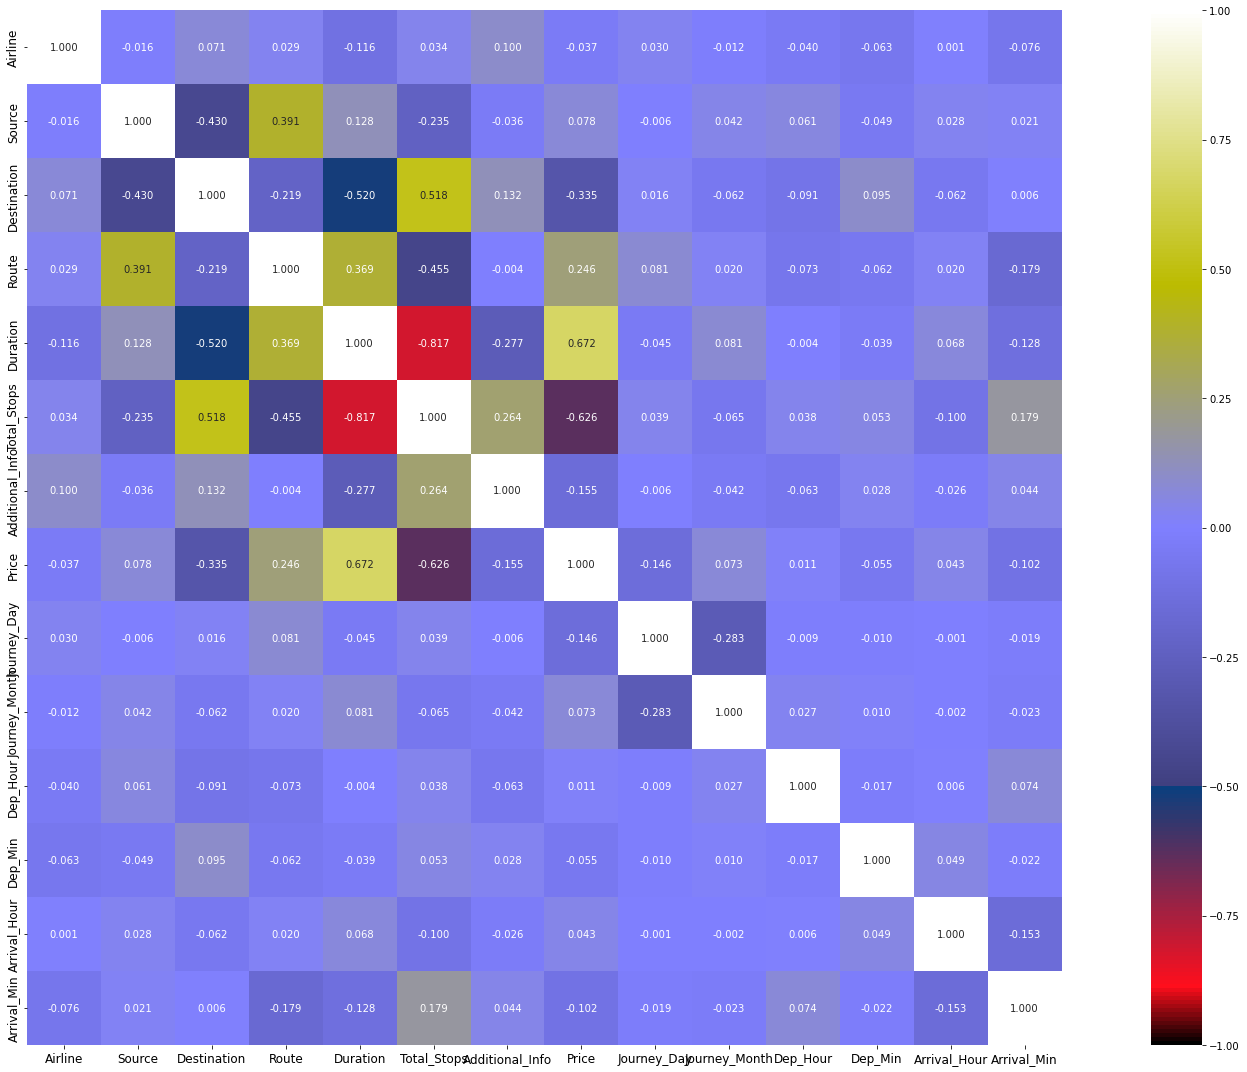

In [49]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

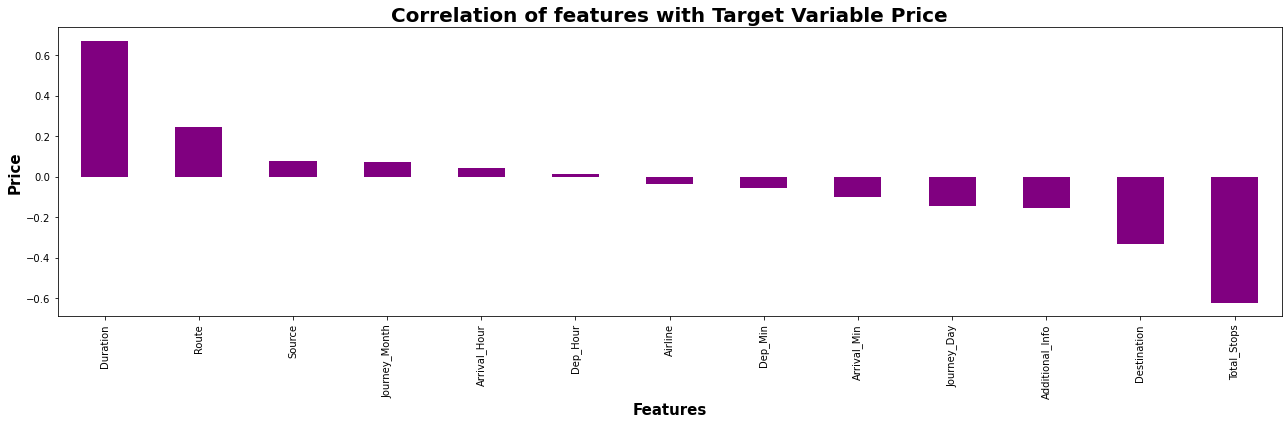

In [50]:
plt.figure(figsize = (18,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price',fontsize = 20,fontweight='bold')
plt.show()

**Total stops and duration are correlated with Target varible with correlation coeffient of 0.6 & more.**

**Maximum correlation in dataset exist between Duration & total stops. They are negatively correlated with each other.**

## Standard Scaling

In [51]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis =1)
Y = df['Price']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## 5. Checking Multicollinearity between features using variance_inflation_factor

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.046279,Airline
1,1.506367,Source
2,1.789798,Destination
3,1.555181,Route
4,3.420045,Duration
5,3.558776,Total_Stops
6,1.126826,Additional_Info
7,1.106882,Journey_Day
8,1.096836,Journey_Month
9,1.033988,Dep_Hour


**Independent feature VIF is within permissible limit of 10**

# PCA

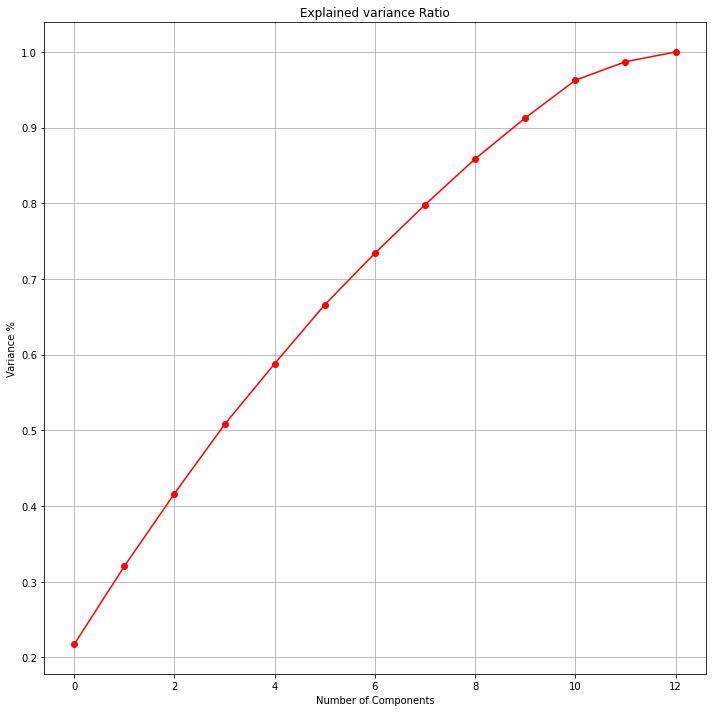

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

### Comment -
**AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data. We shall pick the first 9 components for our prediction.**

In [55]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [56]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

In [57]:
principle_x

,0,1,2,3,4,5,6,7,8
0,2.775224,-0.271727,0.703324,-1.547284,-0.631480,0.791710,1.298413,-1.391755,-1.390415
1,-0.864550,-0.453141,-0.184208,-0.276288,0.912405,-2.076649,-0.666740,0.164596,-0.124260
2,-1.096523,0.628314,-0.184628,1.237910,-1.119941,-1.165107,0.596848,-0.365233,-0.383278
3,-1.456189,1.658951,0.256955,1.511407,1.088930,1.113813,-1.114889,-0.380889,0.056777
4,1.297570,0.610827,-1.022705,-1.592105,0.926046,-0.124960,-0.240243,1.443751,-1.368771
...,...,...,...,...,...,...,...,...,...
10284,0.530621,1.942200,0.184947,0.322783,3.102969,-0.509404,-0.407248,-0.678105,0.317388
10285,0.636499,-0.609072,1.084234,-1.080348,3.040237,0.177553,-0.295038,-0.704967,0.270506
10286,2.731766,-1.038563,-0.374936,-1.165054,-0.832544,0.071566,-0.269328,-0.080933,-0.109464
10287,2.878077,-0.823019,-1.464749,0.354674,-0.545782,1.371519,0.700659,1.550013,-0.462422


# Machine Learning Model Building

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6893, 13)
Training target vector size: (6893,)
Test feature matrix size: (3396, 13)
Test target vector size: (3396,)


## Finding best Random state

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5159382902827081 on Random_state 214


## Linear Regression Base Model

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=214, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 4488.64736916 10989.97240682 12492.30578063 ...  7971.32189149
  5310.4903453   6269.23098453]


Actual Wins:
 5766     4804
4006     6416
9528    19329
5509    13029
2138    16163
        ...  
1391     6582
5473     6979
7999     6152
1909     8016
75       7240
Name: Price, Length: 3396, dtype: int64


## Linear Regression Evaluation Matrix

In [62]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2237.4521917417046
Mean squared error : 7986749.490730628
Root Mean Squared Error: 2826.0837727729568


 R2 Score :
0.5159382902827081


### Cross validation

In [63]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.488961585067113


## Applying other ML Models

In [65]:
from sklearn.ensemble import BaggingRegressor

In [66]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 614.0300322438162
Mean squared error : 1283274.3868315083
Root Mean Squared Error: 1132.8170138338796


 R2 Score :
0.9222231779715876


 Error of  ExtraTreesRegressor() :
Mean absolute error : 607.9288245975658
Mean squared error : 1310714.9238348834
Root Mean Squared Error: 1144.864587553866


 R2 Score :
0.9205600591680205


 Error of  DecisionTreeRegressor() :
Mean absolute error : 695.4321751079702
Mean squared error : 2137839.023213585
Root Mean Squared Error: 1462.1350906170007


 R2 Score :
0.8704296392571034


 Error of  AdaBoostRegressor() :
Mean absolute error : 2175.4391004847516
Mean squared error : 6662236.953731217
Root Mean Squared Error: 2581.1309447083886


 R2 Score :
0.5962144782295108


 Error of  GradientBoostingRegressor() :
Mean absolute error : 1115.0802015698164
Mean squared error : 2388644.909831966
Root Mean Squared Error: 1545.5241537523657


 R2 Score :
0.855228771066038


 Error of  XGBRegressor

In [67]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.9212565508740586


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.921365138474726


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.8695898689961185


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6018600907961622


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8413829554162524


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_

**XGB regressor gives maximum R2 Score of 0.9326 with crossvalidation score 0.93056. So we will perform hyperparameter tuning on this model.**

# Hyper Parameter Tuning : GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [70]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [71]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-4.312 total time=   0.0s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-4.114 total time=   0.1s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-4.277 total time=   0.0s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-4.178 total time=   0.0s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 5/5

[CV 5/5; 8/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-4.033 total time=   0.3s
[CV 1/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.826 total time=   0.4s
[CV 2/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.641 total time=   0.4s
[CV 3/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.780 total time=   0.4s
[CV 4/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.698 total time=   0.4s
[CV 5/5; 9/216] START booster=g

[CV 4/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-4.172 total time=   0.1s
[CV 5/5; 16/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-4.279 total time=   0.1s
[CV 1/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-4.062 total time=   0.2s
[CV 2/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-3.868 total time=   0.1s
[CV 3/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-4.019 total time=   0.1s
[CV 4/5; 17/216] START booster

[CV 3/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-3.778 total time=   0.5s
[CV 4/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-3.699 total time=   0.5s
[CV 5/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-3.801 total time=   0.6s
[CV 1/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=-1.333 total time=   0.1s
[CV 2/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=-1.245 total time=   0.0s
[CV 3/5; 25/216] START b

[CV 2/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.397 total time=   0.3s
[CV 3/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.383 total time=   0.3s
[CV 4/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.418 total time=   0.4s
[CV 5/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.454 total time=   0.3s
[CV 1/5; 33/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 33/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.052 total time=   0.4s
[CV 2/5; 33/216] START booster=gbtree,

[CV 1/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.299 total time=   0.1s
[CV 2/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.196 total time=   0.1s
[CV 3/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.226 total time=   0.1s
[CV 4/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.231 total time=   0.1s
[CV 5/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.292 total time=   0.1s
[CV 1/5; 41/216] START booster=gbtree, 

[CV 5/5; 47/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75;, score=-0.452 total time=   0.6s
[CV 1/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.063 total time=   0.7s
[CV 2/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.100 total time=   0.7s
[CV 3/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.132 total time=   0.7s
[CV 4/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.078 total time=   0.7s
[CV 5/5; 48/216] START boo

[CV 5/5; 55/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.903 total time=   0.2s
[CV 1/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.912 total time=   0.4s
[CV 2/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.914 total time=   0.3s
[CV 3/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.933 total time=   0.3s
[CV 4/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.901 total time=   0.3s
[CV 5/5; 56/216] START booster=gbtree, eta=0.1, gamma

[CV 5/5; 63/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.867 total time=   0.2s
[CV 1/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.874 total time=   0.1s
[CV 2/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.881 total time=   0.1s
[CV 3/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.900 total time=   0.2s
[CV 4/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.866 total time=   0.1s
[CV 5/5; 64/216] START booster=gbtree, eta=0.1, gamm

[CV 5/5; 71/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.920 total time=   0.4s
[CV 1/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.914 total time=   0.6s
[CV 2/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.917 total time=   0.6s
[CV 3/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.936 total time=   0.6s
[CV 4/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.904 total time=   0.6s
[CV 5/5; 72/216] START booster=gbtre

[CV 5/5; 79/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50;, score=-4.277 total time=   0.6s
[CV 1/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-4.060 total time=   1.0s
[CV 2/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-3.868 total time=   1.0s
[CV 3/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-4.017 total time=   1.1s
[CV 4/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-3.928 total time=   1.0s
[CV 5/5; 80/216] START booster=dart, eta=0.001, 

[CV 5/5; 87/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-3.821 total time=   1.3s
[CV 1/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-4.308 total time=   0.4s
[CV 2/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-4.106 total time=   0.4s
[CV 3/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-4.268 total time=   0.4s
[CV 4/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-4.172 total time=   0.4s
[CV 5/5; 88/216] START booster=dart, eta=0.001,

[CV 5/5; 95/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75;, score=-4.033 total time=   1.2s
[CV 1/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-3.825 total time=   1.9s
[CV 2/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-3.640 total time=   1.9s
[CV 3/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-3.778 total time=   1.9s
[CV 4/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-3.699 total time=   1.9s
[CV 5/5; 96/216] START booster=

[CV 5/5; 103/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50;, score=-1.275 total time=   0.5s
[CV 1/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.456 total time=   1.0s
[CV 2/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.397 total time=   1.0s
[CV 3/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.383 total time=   1.0s
[CV 4/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.418 total time=   1.0s
[CV 5/5; 104/216] START booster=dart, eta=0.01, 

[CV 5/5; 111/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=-0.061 total time=   1.3s
[CV 1/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.299 total time=   0.4s
[CV 2/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.196 total time=   0.4s
[CV 3/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.226 total time=   0.4s
[CV 4/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.231 total time=   0.4s
[CV 5/5; 112/216] START booster=dart, eta=0.01,

[CV 5/5; 119/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75;, score=-0.452 total time=   1.2s
[CV 1/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.063 total time=   2.0s
[CV 2/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.100 total time=   2.1s
[CV 3/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.132 total time=   2.0s
[CV 4/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.078 total time=   2.0s
[CV 5/5; 120/216] START booster=dar

[CV 5/5; 127/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.903 total time=   0.5s
[CV 1/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.912 total time=   1.0s
[CV 2/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.914 total time=   1.0s
[CV 3/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.933 total time=   1.0s
[CV 4/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.901 total time=   1.0s
[CV 5/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_

[CV 5/5; 135/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.867 total time=   1.1s
[CV 1/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.874 total time=   0.4s
[CV 2/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.881 total time=   0.4s
[CV 3/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.900 total time=   0.4s
[CV 4/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.866 total time=   0.4s
[CV 5/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max

[CV 5/5; 143/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.920 total time=   1.2s
[CV 1/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.914 total time=   2.0s
[CV 2/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.917 total time=   2.1s
[CV 3/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.936 total time=   2.1s
[CV 4/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.904 total time=   2.0s
[CV 5/5; 144/216] START booster=dart, eta=0.1

[CV 5/5; 148/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-4.256 total time=   0.0s
[CV 1/5; 149/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75
[12:37:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 149/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75;, score=-4.020 total time=   0.0s
[CV 2/5; 149/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75
[12:37:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 149/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75;, score=-3.836 total time=   0.0s
[CV 3/5; 149/216] START

[CV 3/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[12:37:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.743 total time=   0.0s
[CV 4/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[12:37:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.667 total time=   0.0s
[CV 5/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[12:37:09] WARNING: C:\buildkite-agent\builds\buil

[CV 1/5; 158/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=75
[12:37:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 158/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=75;, score=-4.020 total time=   0.0s
[CV 2/5; 158/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=75
[12:37:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 158/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=75;, score=-3.836 total time=   0.0s
[CV 3/5; 158/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=75
[12:37:10] WARNING: C:\buildkite-agent\builds\buildkite

[CV 5/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-4.008 total time=   0.0s
[CV 1/5; 162/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100
[12:37:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 162/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100;, score=-3.780 total time=   0.0s
[CV 2/5; 162/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100
[12:37:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 162/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100;, score=-3.606 total time=   0.0s
[CV 3/5; 162/216] S

[CV 2/5; 166/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=50
[12:37:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 166/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=50;, score=-4.080 total time=   0.0s
[CV 3/5; 166/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=50
[12:37:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 166/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=50;, score=-4.240 total time=   0.0s
[CV 4/5; 166/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=50
[12:37:13] WARNING: C:\buildkite-agent\builds\buil

[CV 2/5; 170/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75;, score=-0.578 total time=   0.0s
[CV 3/5; 170/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75
[12:37:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 170/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75;, score=-0.591 total time=   0.0s
[CV 4/5; 170/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75
[12:37:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 170/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75;, score=-0.611 total time=   0.0s
[CV 5/5; 170/216] START boos

[CV 4/5; 174/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=100;, score=-0.188 total time=   0.0s
[CV 5/5; 174/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=100
[12:37:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 174/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=100;, score=-0.266 total time=   0.0s
[CV 1/5; 175/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50
[12:37:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 175/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50;, score=-1.353 total time=   0.0s
[CV 2/5; 175/216] START b

[CV 2/5; 179/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75;, score=-0.578 total time=   0.0s
[CV 3/5; 179/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75
[12:37:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 179/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75;, score=-0.591 total time=   0.0s
[CV 4/5; 179/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75
[12:37:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 179/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75;, score=-0.611 total time=   0.0s
[CV 5/5; 179/216] START

[CV 4/5; 183/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=-0.188 total time=   0.0s
[CV 5/5; 183/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[12:37:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 183/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=-0.266 total time=   0.0s
[CV 1/5; 184/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[12:37:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 184/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.353 total time=   0.0s
[CV 2/5; 184/216] START b

[CV 3/5; 188/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75
[12:37:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 188/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=-0.591 total time=   0.0s
[CV 4/5; 188/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75
[12:37:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 188/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=-0.611 total time=   0.0s
[CV 5/5; 188/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75
[12:37:19] WARNING: C:\buildkite-agent\builds\buildkite-wind

[CV 5/5; 192/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[12:37:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 192/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=-0.266 total time=   0.0s
[CV 1/5; 193/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[12:37:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 193/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50;, score=0.482 total time=   0.0s
[CV 2/5; 193/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[12:37:20] WARNING: C:\buildkite-agent\builds\buildkite-wind

[CV 2/5; 197/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[12:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 197/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.487 total time=   0.0s
[CV 3/5; 197/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[12:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 197/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.493 total time=   0.0s
[CV 4/5; 197/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[12:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu

[CV 3/5; 201/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[12:37:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 201/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.493 total time=   0.0s
[CV 4/5; 201/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[12:37:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 201/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.474 total time=   0.0s
[CV 5/5; 201/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[12:37:23] WARNING: C:\buildkite-agent\builds\buildkite-window

[CV 5/5; 205/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=50;, score=0.439 total time=   0.0s
[CV 1/5; 206/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75
[12:37:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.483 total time=   0.0s
[CV 2/5; 206/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75
[12:37:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.487 total time=   0.0s
[CV 3/5; 206/216] START booster=gbli

[CV 2/5; 210/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100;, score=0.488 total time=   0.0s
[CV 3/5; 210/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100
[12:37:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 210/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100;, score=0.493 total time=   0.0s
[CV 4/5; 210/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100
[12:37:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 210/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100;, score=0.474 total time=   0.0s
[CV 5/5; 210/216] START booster

[CV 1/5; 215/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75
[12:37:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 215/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.483 total time=   0.0s
[CV 2/5; 215/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75
[12:37:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 215/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.487 total time=   0.0s
[CV 3/5; 215/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75
[12:37:26] WARNING: C:\buildkite-agent\builds\buildkite-window

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [72]:
GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 8,
 'n_estimators': 100}

# Final Regression Model


In [75]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 650.3808400364169
Mean squared error : 1113372.0682012036
Root Mean Squared Error: 1055.1644744783648


 R2 Score of Final Model :
0.9325206346448648




 True Values Vs Predicted Value plot :


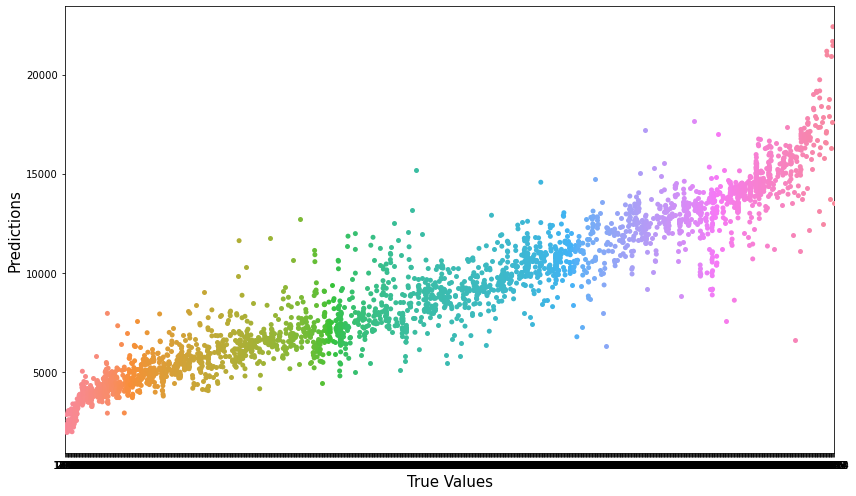

In [74]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Final Regression For Train Dataset Saving Model

In [76]:
import joblib
joblib.dump(Final_mod,'Flight_Price_Final.pkl')

['Flight_Price_Final.pkl']

## Prediction According Final Regression Model

In [77]:
# Loading the saved model
Model = joblib.load("Flight_Price_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

,Actual Values,Predicted Values
0,4804,4802.051758
1,6416,6762.949219
2,19329,17346.197266
3,13029,12854.145508
4,16163,14054.752930
...,...,...
3391,6582,6042.802734
3392,6979,6981.562012
3393,6152,6750.864746
3394,8016,7852.672363


# ML Model for Test Dataset

In [78]:
test_df = pd.read_excel("Test_set.xlsx")

In [79]:
test_df.shape

(2671, 10)

## Feature Engineering Test Dataset

**We will perform same feature which we perform on Train dataset.**

**Converting Date and time columns from object type to Datetime type**

In [80]:
# Converting Date and Time columns from object type to Date type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

**1. Feature Engineering on Date of Journey Columns**

In [81]:
# Extracting Day from Date_of_journey column
test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month

# Dropping Date_of_journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

**2. Feature Engineering on 'Duration' Column**

In [82]:
test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
# convert this column into a numeric
test_df['Duration']=pd.to_numeric(test_df['Duration'])

**3. Feature Engineering on 'Dep_Time' Column**

In [83]:
# Extracting Hours from Dep_Time column
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

**4. Feature Engineering on 'Arrival_Time' Column**

In [84]:
# Extracting Arrival_Hour from Arrival_Time column
test_df['Arrival_Hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
test_df['Arrival_Min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

In [85]:
# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

**Checking Duplicate entry**

In [86]:
test_df.duplicated().sum() # This will check the duplicate data for all columns.

26

In [87]:
test_df.drop_duplicates(keep='last',inplace= True)

In [88]:
test_df.shape

(2645, 13)

**Checking Missing Value**

In [89]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
Airline                       0             0.0
Source                        0             0.0
Destination                   0             0.0
Route                         0             0.0
Duration                      0             0.0
Total_Stops                   0             0.0
Additional_Info               0             0.0
Price                         0             0.0
Journey_Day                   0             0.0
Journey_Month                 0             0.0
Dep_Hour                      0             0.0
Dep_Min                       0             0.0
Arrival_Hour                  0             0.0
Arrival_Min                   0             0.0


In [90]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    test_df[i] = le.fit_transform(test_df[i])
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,655,0,4,6,6,17,30,4,25
1,3,3,0,65,240,0,4,5,12,6,20,10,20
2,4,2,1,76,1425,0,3,21,5,19,15,19,0
3,6,2,1,76,780,0,4,21,5,8,0,21,0
4,0,0,2,16,170,4,4,24,6,23,55,2,45


### Outliers detection and removal

In [91]:
from scipy.stats import zscore
z = np.abs(zscore(test_df))
threshold = 3
test_df1 = test_df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", test_df.shape)
print ("Shape of the dataframe after removing outliers: ", test_df1.shape)
print ("Percentage of data loss post outlier removal: ", (test_df.shape[0]-test_df1.shape[0])/test_df.shape[0]*100)

test_df = test_df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (2645, 13)
Shape of the dataframe after removing outliers:  (2624, 13)
Percentage of data loss post outlier removal:  0.7939508506616257


In [92]:
test_df.skew()

Airline            0.478323
Source            -0.426633
Destination        0.791714
Route             -0.271087
Duration           0.826742
Total_Stops        0.659810
Additional_Info   -0.835966
Journey_Day        0.474518
Journey_Month      0.591529
Dep_Hour           0.076868
Dep_Min            0.134720
Arrival_Hour      -0.436527
Arrival_Min        0.106409
dtype: float64

### Standard Scaling

In [93]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
test_df_scale = scaler.fit_transform(test_df)

## Prediction on Test Dataset Using Final Model

In [94]:
# Loading the saved model
Model = joblib.load("Flight_Price_Final.pkl")

In [95]:
# Predicting the flight price from the features of the testing data
Predicted_Price_test = Model.predict(test_df_scale)
Predicted_Price_test

# Creating dataframe for Test data prediction
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price_test
Prediction

,Price
0,14750.722656
1,4690.046875
2,12601.854492
3,11737.973633
4,4854.763184
...,...
2619,10028.969727
2620,5502.928711
2621,11281.769531
2622,13595.281250


**Writing CSV file of Prediction**

In [96]:
# Saving the Predictions
Prediction.to_csv("Submission_Flight_Price_Data.csv",index=False)